In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mat73

ModuleNotFoundError: No module named 'mat73'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.figure
from pathlib import Path
import os
import wave
import keras
import seaborn as sns
import librosa
import soundfile as sf
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from numpy import mean
from numpy import std
from numpy import dstack
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import BatchNormalization
# from keras.layers.convolutional import Conv1D
# from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
from scipy.io import wavfile
from tqdm import tqdm
import tensorflow as tf



import scipy.io
import tensorflow.keras.backend as K
# import tensorflow_addons as tfa
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.models import Model, load_model
# from tensorflow.keras.optimizers.legacy import Adam
# from tensorflow.keras import layers
# from tensorflow.keras.activations import gelu
from keras.callbacks import EarlyStopping
from tensorflow.python.keras.models import Sequential,Input,Model
from keras.layers import Dense
from keras.layers import Conv2D, MaxPooling2D,BatchNormalization,LeakyReLU

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import TensorDataset, DataLoader
from torch.optim.lr_scheduler import _LRScheduler
import wave,struct

In [3]:
import torch

# **Loading and Preprocessing Data**

## **Loading Files**

In [4]:
from glob import glob
import pandas as pd

In [5]:
y=[]
sr=[]


paths=glob('./data/passage_1/*.wav')

In [6]:
paths_arr=np.array(paths)

In [7]:
paths_arr_sort=np.sort(paths_arr)

In [8]:
paths_arr_sort

array(['./data/passage_1/01_P1.wav', './data/passage_1/02_P1.wav',
       './data/passage_1/03_P1.wav', './data/passage_1/04_P1.wav',
       './data/passage_1/05_P1.wav', './data/passage_1/06_P1.wav',
       './data/passage_1/07_P1.wav', './data/passage_1/08_P1.wav',
       './data/passage_1/09_P1.wav', './data/passage_1/10_P1.wav',
       './data/passage_1/11_P1.wav', './data/passage_1/12_P1.wav',
       './data/passage_1/13_P1.wav', './data/passage_1/14_P1.wav',
       './data/passage_1/15_P1.wav', './data/passage_1/16_P1.wav',
       './data/passage_1/17_P1.wav', './data/passage_1/18_P1.wav',
       './data/passage_1/19_P1.wav', './data/passage_1/20_P1.wav',
       './data/passage_1/21_P1.wav', './data/passage_1/22_P1.wav',
       './data/passage_1/23_P1.wav', './data/passage_1/24_P1.wav',
       './data/passage_1/25_P1.wav', './data/passage_1/26_P1.wav',
       './data/passage_1/27_P1.wav', './data/passage_1/28_P1.wav',
       './data/passage_1/29_P1.wav', './data/passage_1/30_P1.w

In [9]:
audio_data=[]
# sr=[]
for files in paths_arr_sort:
    audio_file,sr=librosa.load(files, sr=16000)

    audio_data.append(audio_file)


In [10]:
len(audio_data)

64

In [11]:
audio_data_col=[]

for i in range (len(audio_data)):
    audio_data_col.append(np.transpose(audio_data[i]))

print(audio_data[5].shape)
audio_data_col[5].shape

(527006,)


(527006,)

In [12]:
audio_data[5]

array([ 8.3987862e-07, -6.1272517e-06, -3.0573941e-05, ...,
        5.3688255e-03,  4.2012953e-03,  3.0546223e-03], dtype=float32)

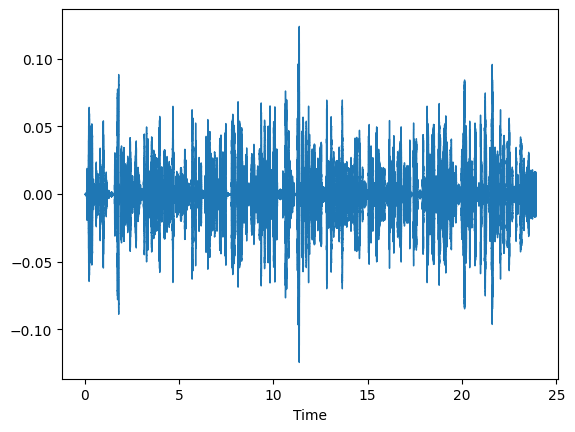

In [13]:
librosa.display.waveshow(audio_data[5])
plt.show()

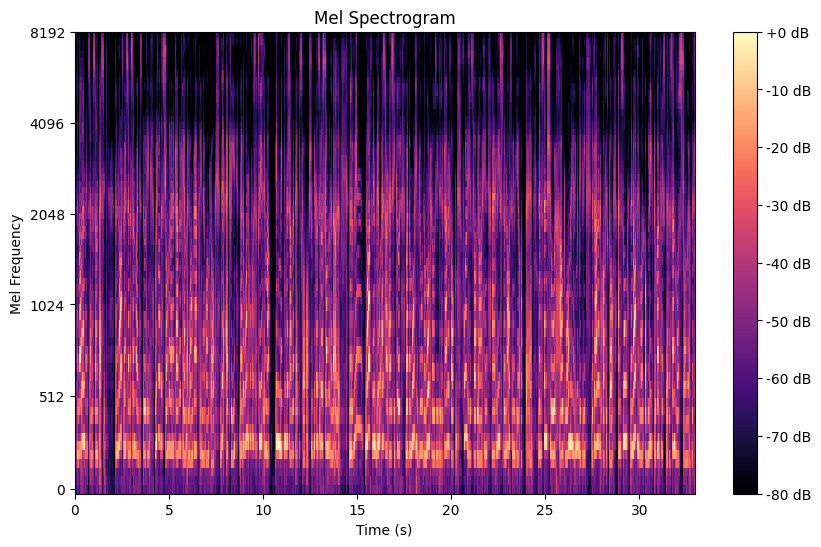

In [14]:
mel_spec = librosa.feature.melspectrogram(y=audio_data[5], sr=16000, n_mels=64, n_fft=1024, hop_length=512, window='hann')

# Convert to decibels (dB)
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

# Display the Mel spectrogram
plt.figure(figsize=(10, 6))
librosa.display.specshow(mel_spec_db, sr=sr, hop_length=512, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Mel Frequency')
plt.show()

In [15]:
df=pd.read_excel('./data/individual_data/SAD_Sorrow Analysis Dataset.xlsx')

In [16]:
print(df.columns)
values = df['Depression'].values

Index(['SPEAKER ID', 'GENDER', 'PHQ-score', 'BDI-score', 'Source',
       'Depression', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'],
      dtype='object')


In [17]:
labels= df['Depression'].values

## **Preprocessing**

### **Filtering Noise (don't run)**

In [18]:
# sr

In [19]:
# def compute_signal_envelope(signal, window_length):
#     """
#     Compute the signal envelope by averaging signal values within a rolling window.

#     Args:
#     - signal: The input audio signal
#     - window_length: Length of the rolling window

#     Returns:
#     - envelope: The computed signal envelope
#     """
#     envelope = np.convolve(np.abs(signal), np.ones(window_length)/window_length, mode='same')
#     return envelope

In [20]:
# audio_data_envelope=[]

# for i in range (len(audio_data)):
#     audio_data_envelope.append(compute_signal_envelope(audio_data[i],window_length=sr//20))

In [21]:
# librosa.display.waveshow(audio_data[5])
# plt.show()

In [22]:
# librosa.display.waveshow(audio_data_envelope[5])
# plt.show()

In [23]:
# def adaptive_thresholding(signal, window_length, sensitivity):
#     """
#     Perform adaptive thresholding on the input signal and filter out noise below the threshold.

#     Args:
#     - signal: The input audio signal
#     - window_length: Length of the rolling window for computing local statistics
#     - sensitivity: Sensitivity parameter for adjusting the threshold

#     Returns:
#     - filtered_signal: The filtered audio signal
#     """
#     # Compute signal envelope
#     envelope = compute_signal_envelope(signal, window_length)

#     # Compute local mean and standard deviation within a rolling window
#     local_mean = np.convolve(envelope, np.ones(window_length)/window_length, mode='same')
#     local_std = np.sqrt(np.convolve((envelope - local_mean)**2, np.ones(window_length)/window_length, mode='same'))

#     # Adjust threshold based on local mean and standard deviation
#     threshold = local_mean + sensitivity * local_std

#     # Filter out noise below the threshold
#     filtered_signal = np.where(envelope > threshold, signal, 0)

#     return filtered_signal


In [24]:
# audio_data_filtered=[]

# for i in range (len(audio_data)):
#     audio_data_filtered.append(adaptive_thresholding(audio_data[i],window_length=sr//20,sensitivity=1))

In [25]:
# librosa.display.waveshow(audio_data_filtered[5])
# plt.show()

In [26]:
# librosa.display.waveshow(audio_data[5])
# plt.show()

### **Segmenting the Signals**

In [27]:
# audio_data=audio_data_filtered

In [18]:
import numpy as np
from scipy.io import wavfile
def segment_voice_recording(audio_path,segment_duration, overlap):
    audio, sr = librosa.load(audio_path, sr=None)
    segment_length = int(segment_duration * sr)
    overlap_length = int(segment_length * overlap)
    segments = []
    for i in range(0, len(audio) - segment_length + 1, segment_length - overlap_length):
        segment = audio[i:i+segment_length]
        segments.append(segment)
    return segments, sr


In [19]:
# Replace the following line with your actual audio loading code
audio_paths = []
for i in range(1, 65):
    if i <= 9:      
        audio_paths.append(f"./data/passage_1/0{i}_P1.wav")
    else:
        audio_paths.append(f"./data/passage_1/{i}_P1.wav")

In [20]:
audio_data

[array([ 8.3989937e-07, -6.1272463e-06, -3.0573945e-05, ...,
         4.8952964e-03,  5.7573696e-03,  5.4446356e-03], dtype=float32),
 array([-1.3651567e-12,  2.3621258e-13,  5.1406275e-12, ...,
        -5.2127079e-04, -6.3928065e-04, -4.4890583e-04], dtype=float32),
 array([-1.8840889e-11, -2.0167508e-11, -2.3447360e-11, ...,
        -4.3527212e-05, -2.3778864e-05, -3.8469648e-07], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([ 8.3954092e-07, -6.1273840e-06, -3.0573941e-05, ...,
         3.0497389e-03,  3.2337366e-03,  2.0907840e-03], dtype=float32),
 array([ 8.3987862e-07, -6.1272517e-06, -3.0573941e-05, ...,
         5.3688255e-03,  4.2012953e-03,  3.0546223e-03], dtype=float32),
 array([ 2.1856225e-05,  1.5672640e-05, -4.9309911e-06, ...,
        -5.6639867e-04, -6.0953910e-04, -4.9968000e-04], dtype=float32),
 array([ 1.1542955e-05, -1.6147094e-05, -6.1056817e-05, ...,
         6.5869483e-04,  6.0272857e-04,  3.7119875e-04], dtype=float32),
 array([

In [21]:
# Replace the following line with your actual audio filtering code
audio_data_filtered = np.zeros_like(audio_data)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (64,) + inhomogeneous part.

In [22]:
all_segments=[]

for i in range(len(audio_paths)):
    all_segments.append(segment_voice_recording(audio_paths[i],segment_duration=5, overlap=0.5))

In [23]:
len(all_segments[0])

2

In [24]:
all_segments_list = []
all_segments = list(all_segments)
for i in range(len(all_segments)):
    temp = []
    temp.append(all_segments[i][0])
    temp.append(all_segments[i][1])
    all_segments_list.append(temp)

all_segments = all_segments_list

In [25]:
# converting list of segments into arrays

segmented_sig=[]
sum=0
for i in range (len(all_segments)):
    all_segments[i][0] = np.array(all_segments[i][0])
    segmented_sig.append(all_segments[i][0])

for i in range (len(segmented_sig)):
    # print(segmented_sig[i].shape)
    sum+=segmented_sig[i].shape[0]

print(sum/len(segmented_sig))



# segmented_sig is a list having k segments of each of the 64 signals, and segmented_sig[i] is an array of shape (k,44100) corresponding to the ith audio file
# k = audio length/segment length + some contribution from overlap

# for each segment there are 44100 samples

# now we can make 85 melspecs per signal so around 5355 total images to feed ONN

15.78125


In [26]:
type(segmented_sig[62])

numpy.ndarray

In [27]:
##### IGNORE THIS #####


# there are total segments = len(all_segments), which include all the 64 recordings

# we have sampled (ie, the segments) every second with an overlap of 0.5 seconds so each segment is 1s second long and the total number of samples is 2*42*64
# (42s = average audio file length, with some variations)
# twice because of overlap

# approximately 85 segments for each auido file



# print(len(all_segments[5][6]))
# len(all_segments)

# all_segments

In [28]:
# import numpy as np

# envelopes=[]
# def compute_signal_envelope(signal, sampling_rate):
#     window_length = sampling_rate // 20
#     rolling_avg = np.convolve(np.abs(signal), np.ones(window_length)/window_length, mode='same')
#     return rolling_avg


# def voice_activity_detection(signal, sampling_rate, threshold):
#     # Compute the signal envelope
#     envelope = compute_signal_envelope(signal, sampling_rate)

#     # Filter out noises below the threshold
#     voice_activity = envelope > threshold

#     # Identify the voice activity segments
#     voice_segments = []
#     segment_indices = []
#     current_segment = []
#     for i, is_voice in enumerate(voice_activity):
#         if is_voice:
#             current_segment.append(signal[i])
#         elif current_segment:
#             voice_segments.append(current_segment)
#             segment_indices.append((i - len(current_segment), i))
#             current_segment = []
#     # Append the last segment if it exists
#     if current_segment:
#         voice_segments.append(current_segment)
#         segment_indices.append((len(signal) - len(current_segment), len(signal)))

#     return voice_segments, segment_indices



# sampling_rate = 44100
# threshold = 0.001

# signal = audio_data[7]


# voice_segments, segment_indices = voice_activity_detection(signal, sampling_rate, threshold)


In [29]:
# envelope = compute_signal_envelope(signal, sampling_rate)

# print(signal.shape)
# envelope.shape


### **BWN Filter and Noise Removal (don't run)**

In [ ]:
# audio_data[6].shape


In [ ]:
# segmented_sig[8].shape

In [ ]:
# segment_dft=np.fft.fft(audio_data[8])

# segment_dft.shape

In [ ]:
# segment_dft

In [ ]:
# type(segment_dft)

In [ ]:
# segment_dft.astype(np.int64)

In [32]:
# segment_freq=[]

# segment_freq=np.fft.fftfreq(segment_dft.shape[0], d=1/sr)

# print(len(segment_freq))
# segment_dft = np.real(segment_dft)

# for j in range (segment_dft.shape[0]):
#     for i in range(1*(len(segment_freq)//sr)+1):
#         segment_dft[j][i]=0
#         segment_dft[j][-i]=0



In [33]:
# len(segment_freq)//sr+1

In [34]:
# segment_dft[27][-6]

In [35]:
# filtered_sig=np.abs(np.fft.ifft(segment_dft))

In [36]:
# filtered_sig.shape

In [37]:
# segmented_sig[8]

In [38]:
# filtered_sig

In [39]:
# librosa.display.waveshow(segmented_sig[8][6])

In [40]:
# librosa.display.waveshow(filtered_sig[6])

### **Creating Melspectrograms**

In [30]:
len(audio_data)

64

In [31]:
segmented_sig[5][8].shape

(220500,)

In [32]:
len(segmented_sig)

64

In [33]:
from transformers import AutoFeatureExtractor, Wav2Vec2ForSequenceClassification
#from datasets import load_dataset
import torch

In [34]:
feature_extractor = AutoFeatureExtractor.from_pretrained("superb/wav2vec2-base-superb-ks")
model = Wav2Vec2ForSequenceClassification.from_pretrained("superb/wav2vec2-base-superb-ks")

/Users/apple/anaconda3/envs/ml1/lib/python3.10/site-packages/transformers/configuration_utils.py:363: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(


ConnectionError: HTTPSConnectionPool(host='huggingface.co', port=443): Max retries exceeded with url: /superb/wav2vec2-base-superb-ks/resolve/main/model.safetensors (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x3378fa710>: Failed to establish a new connection: [Errno 61] Connection refused'))

In [ ]:
audio_data[0].shape

In [ ]:
!pip install git+https://github.com/huggingface/datasets.git
!pip install git+https://github.com/huggingface/transformers.git
!pip install jiwer
!pip install torchaudio
!pip install librosa

# Monitor the training process
!pip install wandb

In [ ]:
import numpy as np
import pandas as pd

from pathlib import Path
from tqdm import tqdm

import torchaudio
from sklearn.model_selection import train_test_split

import os
import sys

In [ ]:
data = []
i = 0
for path in tqdm(Path("./data/passage_1").glob("**/*.wav")):
    name = str(path).split('/')[-1].split('.')[0]
    
    label = labels[i]

    i += 1
    
    try:
        # There are some broken files
        s = torchaudio.load(path)
        data.append({
            "name": name,
            "path": path,
            "emotion": label
        })
    except Exception as e:
        # print(str(path), e)
        pass

    # break

In [ ]:
df = pd.DataFrame(data)
df.head()

In [ ]:
# Filter broken and non-existed paths

print(f"Step 0: {len(df)}")

df["status"] = df["path"].apply(lambda path: True if os.path.exists(path) else None)
df = df.dropna(subset=["path"])
#df = df.drop("status", 1)
print(f"Step 1: {len(df)}")

df = df.sample(frac=1)
df = df.reset_index(drop=True)
df.head()

In [ ]:
depression_count = 0

for i in range(len(df)):
    if int(df["emotion"][i]) == 1:
        depression_count += 1

print(depression_count)

In [ ]:
print("Labels: ", df["emotion"].unique())
print()
df.groupby("emotion").count()[["path"]]

In [ ]:
import torchaudio
import librosa
import IPython.display as ipd
import numpy as np

idx = np.random.randint(0, len(df))
sample = df.iloc[idx]
path = sample["path"]
label = sample["emotion"]

print(f"ID Location: {idx}")
print(f"      Label: {label}")
print()

speech, sr = torchaudio.load(path)
speech = speech[0].numpy().squeeze()
speech_resampled = librosa.resample(np.asarray(speech), orig_sr=sr, target_sr=16000)
ipd.Audio(data=np.asarray(speech_resampled), autoplay=True, rate=16000)


In [ ]:
save_path = "./data"

train_df, test_df = train_test_split(df, test_size=0.2, random_state=101, stratify=df["emotion"])

train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

train_df.to_csv(f"{save_path}/train.csv", sep="\t", encoding="utf-8", index=False)
test_df.to_csv(f"{save_path}/test.csv", sep="\t", encoding="utf-8", index=False)


print(train_df.shape)
print(test_df.shape)

In [ ]:
!pip install --upgrade huggingface_hub
!pip install --upgrade pip
!pip install --upgrade <package_name>


In [ ]:
import huggingface_hub
!pip install ipywidgets

In [ ]:
# Loading the created dataset using datasets
from datasets import load_dataset, load_metric


data_files = {
    "train": "./data/train.csv", 
    "validation": "./data/test.csv",
}

dataset = load_dataset("csv", data_files=data_files, delimiter="\t", )
train_dataset = dataset["train"]
eval_dataset = dataset["validation"]

print(train_dataset)
print(eval_dataset)

In [ ]:
# We need to specify the input and output column
input_column = "path"
output_column = "emotion"

In [ ]:
# we need to distinguish the unique labels in our SER dataset
label_list = train_dataset.unique(output_column)
label_list.sort()  # Let's sort it for determinism
num_labels = len(label_list)
print(f"A classification problem with {num_labels} classes: {label_list}")

In [ ]:
from transformers import AutoConfig, Wav2Vec2Processor

In [ ]:
model_name_or_path = "lighteternal/wav2vec2-large-xlsr-53-greek"
pooling_mode = "mean"

In [ ]:
# config
config = AutoConfig.from_pretrained(
    model_name_or_path,
    num_labels=num_labels,
    label2id={label: i for i, label in enumerate(label_list)},
    id2label={i: label for i, label in enumerate(label_list)},
    finetuning_task="wav2vec2_clf",
)
setattr(config, 'pooling_mode', pooling_mode)

In [ ]:
processor = Wav2Vec2Processor.from_pretrained(model_name_or_path,)
target_sampling_rate = processor.feature_extractor.sampling_rate
print(f"The target sampling rate: {target_sampling_rate}")

In [ ]:
def speech_file_to_array_fn(path):
    speech_array, sampling_rate = torchaudio.load(path)
    resampler = torchaudio.transforms.Resample(sampling_rate, target_sampling_rate)
    speech = resampler(speech_array).squeeze().numpy()
    return speech

def label_to_id(label, label_list):

    if len(label_list) > 0:
        return label_list.index(label) if label in label_list else -1

    return label

def preprocess_function(examples):
    speech_list = [speech_file_to_array_fn(path) for path in examples[input_column]]
    target_list = [label_to_id(label, label_list) for label in examples[output_column]]

    result = processor(speech_list, sampling_rate=target_sampling_rate)
    result["labels"] = list(target_list)

    return result

In [ ]:
train_dataset = train_dataset.map(
    preprocess_function,
    batch_size=100,
    batched=True,
    num_proc=4
)
eval_dataset = eval_dataset.map(
    preprocess_function,
    batch_size=100,
    batched=True,
    num_proc=4
)

In [ ]:
idx = 0
print(f"Training input_values: {train_dataset[idx]['input_values']}")
print(f"Training attention_mask: {train_dataset[idx]['attention_mask']}")
print(f"Training labels: {train_dataset[idx]['labels']} - {train_dataset[idx]['emotion']}")

In [ ]:
from dataclasses import dataclass
from typing import Optional, Tuple
import torch
from transformers.file_utils import ModelOutput


@dataclass
class SpeechClassifierOutput(ModelOutput):
    loss: Optional[torch.FloatTensor] = None
    logits: torch.FloatTensor = None
    hidden_states: Optional[Tuple[torch.FloatTensor]] = None
    attentions: Optional[Tuple[torch.FloatTensor]] = None


In [ ]:
import torch
import torch.nn as nn
from torch.nn import BCEWithLogitsLoss, CrossEntropyLoss, MSELoss

from transformers.models.wav2vec2.modeling_wav2vec2 import (
    Wav2Vec2PreTrainedModel,
    Wav2Vec2Model
)


class Wav2Vec2ClassificationHead(nn.Module):
    """Head for wav2vec classification task."""

    def __init__(self, config):
        super().__init__()
        self.dense = nn.Linear(config.hidden_size, config.hidden_size)
        self.dropout = nn.Dropout(config.final_dropout)
        self.out_proj = nn.Linear(config.hidden_size, config.num_labels)

    def forward(self, features, **kwargs):
        x = features
        x = self.dropout(x)
        x = self.dense(x)
        x = torch.tanh(x)
        x = self.dropout(x)
        x = self.out_proj(x)
        return x


class Wav2Vec2ForSpeechClassification(Wav2Vec2PreTrainedModel):
    def __init__(self, config):
        super().__init__(config)
        self.num_labels = config.num_labels
        self.pooling_mode = config.pooling_mode
        self.config = config

        self.wav2vec2 = Wav2Vec2Model(config)
        self.classifier = Wav2Vec2ClassificationHead(config)

        self.init_weights()

    def freeze_feature_extractor(self):
        self.wav2vec2.feature_extractor._freeze_parameters()

    def merged_strategy(
            self,
            hidden_states,
            mode="mean"
    ):
        if mode == "mean":
            outputs = torch.mean(hidden_states, dim=1)
        elif mode == "sum":
            outputs = torch.sum(hidden_states, dim=1)
        elif mode == "max":
            outputs = torch.max(hidden_states, dim=1)[0]
        else:
            raise Exception(
                "The pooling method hasn't been defined! Your pooling mode must be one of these ['mean', 'sum', 'max']")

        return outputs

    def forward(
            self,
            input_values,
            attention_mask=None,
            output_attentions=None,
            output_hidden_states=None,
            return_dict=None,
            labels=None,
    ):
        return_dict = return_dict if return_dict is not None else self.config.use_return_dict
        outputs = self.wav2vec2(
            input_values,
            attention_mask=attention_mask,
            output_attentions=output_attentions,
            output_hidden_states=output_hidden_states,
            return_dict=return_dict,
        )
        hidden_states = outputs[0]
        hidden_states = self.merged_strategy(hidden_states, mode=self.pooling_mode)
        logits = self.classifier(hidden_states)

        loss = None
        if labels is not None:
            if self.config.problem_type is None:
                if self.num_labels == 1:
                    self.config.problem_type = "regression"
                elif self.num_labels > 1 and (labels.dtype == torch.long or labels.dtype == torch.int):
                    self.config.problem_type = "single_label_classification"
                else:
                    self.config.problem_type = "multi_label_classification"

            if self.config.problem_type == "regression":
                loss_fct = MSELoss()
                loss = loss_fct(logits.view(-1, self.num_labels), labels)
            elif self.config.problem_type == "single_label_classification":
                loss_fct = CrossEntropyLoss()
                loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))
            elif self.config.problem_type == "multi_label_classification":
                loss_fct = BCEWithLogitsLoss()
                loss = loss_fct(logits, labels)

        if not return_dict:
            output = (logits,) + outputs[2:]
            return ((loss,) + output) if loss is not None else output

        return SpeechClassifierOutput(
            loss=loss,
            logits=logits,
            hidden_states=outputs.hidden_states,
            attentions=outputs.attentions,
        )


In [ ]:
from dataclasses import dataclass
from typing import Dict, List, Optional, Union
import torch

import transformers
from transformers import Wav2Vec2Processor


@dataclass
class DataCollatorCTCWithPadding:
    """
    Data collator that will dynamically pad the inputs received.
    Args:
        processor (:class:`~transformers.Wav2Vec2Processor`)
            The processor used for proccessing the data.
        padding (:obj:`bool`, :obj:`str` or :class:`~transformers.tokenization_utils_base.PaddingStrategy`, `optional`, defaults to :obj:`True`):
            Select a strategy to pad the returned sequences (according to the model's padding side and padding index)
            among:
            * :obj:`True` or :obj:`'longest'`: Pad to the longest sequence in the batch (or no padding if only a single
              sequence if provided).
            * :obj:`'max_length'`: Pad to a maximum length specified with the argument :obj:`max_length` or to the
              maximum acceptable input length for the model if that argument is not provided.
            * :obj:`False` or :obj:`'do_not_pad'` (default): No padding (i.e., can output a batch with sequences of
              different lengths).
        max_length (:obj:`int`, `optional`):
            Maximum length of the ``input_values`` of the returned list and optionally padding length (see above).
        max_length_labels (:obj:`int`, `optional`):
            Maximum length of the ``labels`` returned list and optionally padding length (see above).
        pad_to_multiple_of (:obj:`int`, `optional`):
            If set will pad the sequence to a multiple of the provided value.
            This is especially useful to enable the use of Tensor Cores on NVIDIA hardware with compute capability >=
            7.5 (Volta).
    """

    processor: Wav2Vec2Processor
    padding: Union[bool, str] = True
    max_length: Optional[int] = None
    max_length_labels: Optional[int] = None
    pad_to_multiple_of: Optional[int] = None
    pad_to_multiple_of_labels: Optional[int] = None

    def __call__(self, features: List[Dict[str, Union[List[int], torch.Tensor]]]) -> Dict[str, torch.Tensor]:
        input_features = [{"input_values": feature["input_values"]} for feature in features]
        label_features = [feature["labels"] for feature in features]

        d_type = torch.long if isinstance(label_features[0], int) else torch.float

        batch = self.processor.pad(
            input_features,
            padding=self.padding,
            max_length=self.max_length,
            pad_to_multiple_of=self.pad_to_multiple_of,
            return_tensors="pt",
        )

        batch["labels"] = torch.tensor(label_features, dtype=d_type)

        return batch

In [ ]:
data_collator = DataCollatorCTCWithPadding(processor=processor, padding=True)

In [ ]:
is_regression = False

In [ ]:
import numpy as np
from transformers import EvalPrediction


def compute_metrics(p: EvalPrediction):
    preds = p.predictions[0] if isinstance(p.predictions, tuple) else p.predictions
    preds = np.squeeze(preds) if is_regression else np.argmax(preds, axis=1)

    if is_regression:
        return {"mse": ((preds - p.label_ids) ** 2).mean().item()}
    else:
        return {"accuracy": (preds == p.label_ids).astype(np.float32).mean().item()}

In [ ]:
model = Wav2Vec2ForSpeechClassification.from_pretrained(
    model_name_or_path,
    config=config,
)

In [ ]:
model.freeze_feature_extractor()

In [ ]:
# from google.colab import drive

# drive.mount('/gdrive')

In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="/content/wav2vec2-xlsr-greek-speech-emotion-recognition",
    # output_dir="/content/gdrive/MyDrive/wav2vec2-xlsr-greek-speech-emotion-recognition"
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    gradient_accumulation_steps=2,
    evaluation_strategy="steps",
    num_train_epochs=1.0,
    fp16=True,
    save_steps=10,
    eval_steps=10,
    logging_steps=10,
    learning_rate=1e-4,
    save_total_limit=2,
)

In [ ]:
from typing import Any, Dict, Union

import torch
from packaging import version
from torch import nn

from transformers import (
    Trainer,
    is_apex_available,
)

if is_apex_available():
    from apex import amp

if version.parse(torch.__version__) >= version.parse("1.6"):
    _is_native_amp_available = True
    from torch.cuda.amp import autocast


class CTCTrainer(Trainer):
    def training_step(self, model: nn.Module, inputs: Dict[str, Union[torch.Tensor, Any]]) -> torch.Tensor:
        """
        Perform a training step on a batch of inputs.

        Subclass and override to inject custom behavior.

        Args:
            model (:obj:`nn.Module`):
                The model to train.
            inputs (:obj:`Dict[str, Union[torch.Tensor, Any]]`):
                The inputs and targets of the model.

                The dictionary will be unpacked before being fed to the model. Most models expect the targets under the
                argument :obj:`labels`. Check your model's documentation for all accepted arguments.

        Return:
            :obj:`torch.Tensor`: The tensor with training loss on this batch.
        """

        model.train()
        inputs = self._prepare_inputs(inputs)

        if self.use_amp:
            with autocast():
                loss = self.compute_loss(model, inputs)
        else:
            loss = self.compute_loss(model, inputs)

        if self.args.gradient_accumulation_steps > 1:
            loss = loss / self.args.gradient_accumulation_steps

        if self.use_amp:
            self.scaler.scale(loss).backward()
        elif self.use_apex:
            with amp.scale_loss(loss, self.optimizer) as scaled_loss:
                scaled_loss.backward()
        elif self.deepspeed:
            self.deepspeed.backward(loss)
        else:
            loss.backward()

        return loss.detach()


In [ ]:
trainer = CTCTrainer(
    model=model,
    data_collator=data_collator,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    tokenizer=processor.feature_extractor,
)

In [ ]:
trainer.train()

In [ ]:
import librosa
from sklearn.metrics import classification_report

In [ ]:
test_dataset = load_dataset("csv", data_files={"test": "/content/data/test.csv"}, delimiter="\t")["test"]
test_dataset

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device: {device}")

In [ ]:
model_name_or_path = "m3hrdadfi/wav2vec2-xlsr-greek-speech-emotion-recognition"
config = AutoConfig.from_pretrained(model_name_or_path)
processor = Wav2Vec2Processor.from_pretrained(model_name_or_path)
model = Wav2Vec2ForSpeechClassification.from_pretrained(model_name_or_path).to(device)

In [ ]:
def speech_file_to_array_fn(batch):
    speech_array, sampling_rate = torchaudio.load(batch["path"])
    speech_array = speech_array.squeeze().numpy()
    speech_array = librosa.resample(np.asarray(speech_array), sampling_rate, processor.feature_extractor.sampling_rate)

    batch["speech"] = speech_array
    return batch


def predict(batch):
    features = processor(batch["speech"], sampling_rate=processor.feature_extractor.sampling_rate, return_tensors="pt", padding=True)

    input_values = features.input_values.to(device)
    attention_mask = features.attention_mask.to(device)

    with torch.no_grad():
        logits = model(input_values, attention_mask=attention_mask).logits 

    pred_ids = torch.argmax(logits, dim=-1).detach().cpu().numpy()
    batch["predicted"] = pred_ids
    return batch

In [ ]:
test_dataset = test_dataset.map(speech_file_to_array_fn)

In [ ]:
result = test_dataset.map(predict, batched=True, batch_size=8)

In [ ]:
label_names = [config.id2label[i] for i in range(config.num_labels)]
label_names

In [ ]:
y_true = [config.label2id[name] for name in result["emotion"]]
y_pred = result["predicted"]

print(y_true[:5])
print(y_pred[:5])

In [ ]:
print(classification_report(y_true, y_pred, target_names=label_names))

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchaudio
from transformers import AutoConfig, Wav2Vec2Processor

import librosa
import IPython.display as ipd
import numpy as np
import pandas as pd

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_name_or_path = "m3hrdadfi/wav2vec2-xlsr-greek-speech-emotion-recognition"
config = AutoConfig.from_pretrained(model_name_or_path)
processor = Wav2Vec2Processor.from_pretrained(model_name_or_path)
sampling_rate = processor.feature_extractor.sampling_rate
model = Wav2Vec2ForSpeechClassification.from_pretrained(model_name_or_path).to(device)

In [ ]:
def speech_file_to_array_fn(path, sampling_rate):
    speech_array, _sampling_rate = torchaudio.load(path)
    resampler = torchaudio.transforms.Resample(_sampling_rate)
    speech = resampler(speech_array).squeeze().numpy()
    return speech


def predict(path, sampling_rate):
    speech = speech_file_to_array_fn(path, sampling_rate)
    features = processor(speech, sampling_rate=sampling_rate, return_tensors="pt", padding=True)

    input_values = features.input_values.to(device)
    attention_mask = features.attention_mask.to(device)

    with torch.no_grad():
        logits = model(input_values, attention_mask=attention_mask).logits

    scores = F.softmax(logits, dim=1).detach().cpu().numpy()[0]
    outputs = [{"Emotion": config.id2label[i], "Score": f"{round(score * 100, 3):.1f}%"} for i, score in enumerate(scores)]
    return outputs


STYLES = """
<style>
div.display_data {
    margin: 0 auto;
    max-width: 500px;
}
table.xxx {
    margin: 50px !important;
    float: right !important;
    clear: both !important;
}
table.xxx td {
    min-width: 300px !important;
    text-align: center !important;
}
</style>
""".strip()

def prediction(df_row):
    path, emotion = df_row["path"], df_row["emotion"]
    df = pd.DataFrame([{"Emotion": emotion, "Sentence": "    "}])
    setup = {
        'border': 2,
        'show_dimensions': True,
        'justify': 'center',
        'classes': 'xxx',
        'escape': False,
    }
    ipd.display(ipd.HTML(STYLES + df.to_html(**setup) + "<br />"))
    speech, sr = torchaudio.load(path)
    speech = speech[0].numpy().squeeze()
    speech = librosa.resample(np.asarray(speech), sr, sampling_rate)
    ipd.display(ipd.Audio(data=np.asarray(speech), autoplay=True, rate=sampling_rate))

    outputs = predict(path, sampling_rate)
    r = pd.DataFrame(outputs)
    ipd.display(ipd.HTML(STYLES + r.to_html(**setup) + "<br />"))

In [ ]:
test = pd.read_csv("/content/data/test.csv", sep="\t")
test.head()

In [ ]:
prediction(test.iloc[0])

In [ ]:
prediction(test.iloc[1])

In [ ]:
prediction(test.iloc[2])

In [191]:
# audio file is decoded on the fly
inputs = feature_extractor(audio_data[0], sampling_rate=16000, return_tensors="pt")

print(inputs["input_values"].shape)
with torch.no_grad():
    logits = model(**inputs).logits

predicted_class_ids = torch.argmax(logits, dim=-1).item()
predicted_label = model.config.id2label[predicted_class_ids]
predicted_label

torch.Size([1, 635806])


'_unknown_'

In [190]:
# compute loss - target_label is e.g. "down"
target_label = model.config.id2label[0]
inputs["labels"] = torch.tensor([model.config.label2id[target_label]])
loss = model(**inputs).loss
round(loss.item(), 2)

9.4

In [165]:
audio_data[0]

(1752439,)

In [163]:
len(labels)

64

In [103]:
import librosa

l=len(segmented_sig)

nfft=1024
win_length=1024
hop_length=410;sr=44100
audio_rgb_list_all=[]

d_shape=64


total_imgs=0 # to store total number of images from all the recordings co
labels_final=[]

import cv2 as cvlib
for j in range (l):
  r=len(segmented_sig[j])
  audio_rgb_list=[]




  for i in range(r):

    clip=segmented_sig[j][i]
    mel_spec=librosa.feature.melspectrogram( y=clip, sr=4000,n_mels=64, n_fft=1024, hop_length=410, win_length=1024, window='hann')
    log_spectrogram = librosa.amplitude_to_db(mel_spec)
    norm=(log_spectrogram-np.min(log_spectrogram))/(np.max(log_spectrogram)-np.min(log_spectrogram))
    img = norm
    img=cvlib.resize(img, dsize=(d_shape,d_shape), interpolation=cvlib.INTER_CUBIC)
    audio_rgb_list.append(img)

    labels_final.append(labels[j])


#   print(len(audio_rgb_list))
  total_imgs+= len(audio_rgb_list)
  audio_rgb_list_all.append(audio_rgb_list)

print('Total no. of images:' +str(total_imgs))
# x=np.array(audio_rgb_list_all)
# print('shape of prev spectrogram dataset'+str(np.shape(x)))
# X=np.reshape(x,(k,1,d_shape,d_shape))
# print('shape of one spectrogram dataset'+str(np.shape(X)))

Total no. of images:1010


In [112]:
labels_final

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,


In [108]:
audio_rgb_list_all

[[array([[ 0.        ,  0.        ,  0.        , ...,  0.5593419 ,
           0.382536  ,  0.9368747 ],
         [ 0.        ,  0.        ,  0.        , ...,  0.2236289 ,
           0.3519475 ,  0.8892889 ],
         [ 0.        ,  0.        ,  0.        , ..., -0.00411138,
           0.02746891,  0.03758134],
         ...,
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ]], dtype=float32),
  array([[ 0.5074647 ,  0.8779891 ,  0.82966286, ...,  0.07276831,
           0.77002764,  0.8526161 ],
         [ 0.3184406 ,  0.80315554,  0.59418476, ...,  0.02257757,
           0.29228625,  0.9156157 ],
         [ 0.        , -0.00773788,  0.01981489, ...,  0.        ,
           0.        ,  0.4004429 ],
         ...,
         [ 0.      

In [107]:
len(audio_rgb_list_all[0])

14

In [113]:
segmented_melspec=[] # to store the segmented melspecs as arrays in a list of arrays
sum=0

for i in range (len(audio_rgb_list_all)):
    audio_rgb_list_all[i]=np.array(audio_rgb_list_all[i])
    segmented_melspec.append(audio_rgb_list_all[i])

for i in range (len(segmented_melspec)):
    # print(segmented_sig[i].shape)
    sum+=segmented_melspec[i].shape[0]

print(sum/len(segmented_melspec))

15.78125


In [114]:
# segmented_melspec_arr=np.array(segmented_melspec)
type(segmented_melspec[8])

numpy.ndarray

In [115]:
len(segmented_melspec[0][0])

64

In [134]:
len(segmented_melspec[0][2])

64

In [135]:
melspec_data_arr=np.zeros((total_imgs,len(segmented_melspec[0][0]),len(segmented_melspec[0][0])))
k=0

for i in range (len(segmented_melspec)):
    for j in range (len(segmented_melspec[i])):

        melspec_data_arr[k]=segmented_melspec[i][j]
        k+=1


In [138]:
melspec_data_arr.shape

(1010, 64, 64)

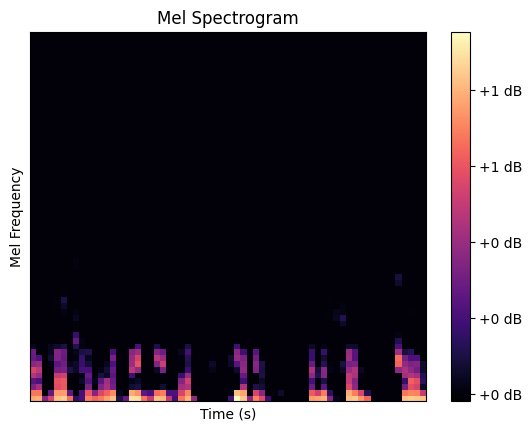

In [139]:
librosa.display.specshow(melspec_data_arr[314])
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Mel Frequency')
plt.show()

# **ONN**

##**Dependencies**

In [32]:
import torch
torch.cuda.empty_cache()
torch.cuda.memory_summary(device=None, abbreviated=False)

'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |      0 B   |      0 B   |      0 B   |      0 B   |\n|       from large pool |      0 B   |      0 B   |      0 B   |      0 B   |\n|       from small pool |      0 B   |      0 B   |      0 B   |      0 B   |\n|---------------------------------------------------------------------------|\n| Active memory         |      0 B   |      0 B   |      0 B   |      0 B   |\n|       from large pool |      0 B   |      0 B   |

In [33]:
!git clone https://github.com/junaidmalik09/fastonn.git
%cd /content/fastonn
!pip install .
import fastonn
from fastonn import SelfONN2d

Cloning into 'fastonn'...
remote: Enumerating objects: 178, done.
remote: Counting objects:   0% (1/103)
remote: Counting objects:   1% (2/103)
remote: Counting objects:   2% (3/103)
remote: Counting objects:   3% (4/103)
remote: Counting objects:   4% (5/103)
remote: Counting objects:   5% (6/103)
remote: Counting objects:   6% (7/103)
remote: Counting objects:   7% (8/103)
remote: Counting objects:   8% (9/103)
remote: Counting objects:   9% (10/103)
remote: Counting objects:  10% (11/103)
remote: Counting objects:  11% (12/103)
remote: Counting objects:  12% (13/103)
remote: Counting objects:  13% (14/103)
remote: Counting objects:  14% (15/103)
remote: Counting objects:  15% (16/103)
remote: Counting objects:  16% (17/103)
remote: Counting objects:  17% (18/103)
remote: Counting objects:  18% (19/103)
remote: Counting objects:  19% (20/103)
remote: Counting objects:  20% (21/103)
remote: Counting objects:  21% (22/103)
remote: Counting objects:  22% (23/103)
remote: Counting object

/content/fastonn/fastonn/utils/utils.py:347: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if val_rate is 0: return [[np.reshape(np.array([indices]),(len(indices),)),np.array([])]]


In [34]:
dir(fastonn)

['F',
 'Function',
 'Iterable',
 'Module',
 'OpBlock',
 'OpNetwork',
 'OpTier',
 'Optional',
 'Parameter',
 'SelfONN',
 'SelfONN1d',
 'SelfONN2d',
 'SuperONN2d',
 'Tensor',
 'Trainer',
 'Tuple',
 'Union',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'cat',
 'chirp',
 'cubic',
 'expp',
 'getOPLIB',
 'lincut',
 'logg',
 'math',
 'maxx',
 'medd',
 'mul',
 'myrelu',
 'nn',
 'no_grad',
 'osl',
 'randomshift',
 'repeat',
 'sinc',
 'sinc2',
 'sincs2',
 'sine',
 'sinh',
 'summ',
 'tanh',
 'tanh2',
 'torch',
 'trainer',
 'utils']

In [35]:
import torch
torch.cuda.empty_cache()
torch.cuda.memory_summary(device=None, abbreviated=False)

'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |      0 B   |      0 B   |      0 B   |      0 B   |\n|       from large pool |      0 B   |      0 B   |      0 B   |      0 B   |\n|       from small pool |      0 B   |      0 B   |      0 B   |      0 B   |\n|---------------------------------------------------------------------------|\n| Active memory         |      0 B   |      0 B   |      0 B   |      0 B   |\n|       from large pool |      0 B   |      0 B   |

In [36]:
import gc
torch.cuda.empty_cache()
gc.collect()

242

## **Data Split**

In [140]:
X=np.reshape(melspec_data_arr,(melspec_data_arr.shape[0],1,len(segmented_melspec[0][0]),len(segmented_melspec[0][0])))
Y=np.array(labels_final)

In [142]:
X.shape

(1010, 1, 64, 64)

In [143]:
from sklearn.model_selection import train_test_split
def create_datasets(X, Y,test_size=0.15,seed=None):
    X_train1, X_test, y_train1, y_test = train_test_split(X, Y, test_size=0.1,random_state=seed)


    print(y_test.shape)
    # print(snr_list_test.shape)

    # X_train, X_valid, y_train, y_valid,snr_list_train, snr_list_valid = train_test_split(X_train1, y_train1,snr_list1, test_size=0.1,random_state=seed)
    X_train, X_valid, y_train, y_valid = train_test_split(X_train1, y_train1, test_size=0.1,random_state=seed)


    X_train, X_valid, X_test = [torch.tensor(arr, dtype=torch.float32) for arr in (X_train, X_valid, X_test)]
    y_train, y_valid, y_test = [torch.tensor(arr, dtype=torch.long) for arr in (y_train, y_valid, y_test)]


    train_ds = TensorDataset(X_train, y_train)
    valid_ds = TensorDataset(X_valid, y_valid)
    test_ds= TensorDataset(X_test, y_test)



    return train_ds, valid_ds, test_ds



In [144]:
def create_loaders(train_ds, valid_ds, test_ds,bs, jobs=0):
    train_dl = DataLoader(train_ds, bs, shuffle=True, num_workers=jobs)
    valid_dl = DataLoader(valid_ds, bs, shuffle=False, num_workers=jobs)
    test_dl = DataLoader(test_ds, bs, shuffle=False, num_workers=jobs)

    # snr_list_train_dl = DataLoader(snr_list_train_ds, bs, shuffle=True, num_workers=jobs)
    # snr_list_valid_dl = DataLoader(snr_list_valid_ds, bs, shuffle=False, num_workers=jobs)
    # snr_list_test_dl = DataLoader(snr_list_test_ds, bs, shuffle=False, num_workers=jobs)
    return train_dl, valid_dl,test_dl
    # ,snr_list_train_dl ,snr_list_valid_dl,snr_list_test_dl

In [145]:
print('Preparing datasets')
trn_ds, val_ds, tst_ds  = create_datasets(X,Y,seed=25)
# snr_list_train_ds,snr_list_valid_ds,snr_list_test_ds

Preparing datasets
(101,)


In [146]:
bs = 128
print(f'Creating data loaders with batch size: {bs}')
trn_dl, val_dl,tst_dl = create_loaders(trn_ds, val_ds,tst_ds, bs)

Creating data loaders with batch size: 128


**TRIPLET** **DATA** **SPLIT** **AND** **TRAINING**

In [37]:
import random
def plot_triplets(examples):
    plt.figure(figsize=(18, 3))
    for i in range(3):
        plt.subplot(1, 3, 1 + i)
        plt.imshow(np.reshape(examples[i], (224,224,3)))
        plt.xticks([])
        plt.yticks([])
        if i==0:
          plt.title('Anchor');
        elif i==1:
          plt.title('Positive')
        elif i==2:
          plt.title('Negetive')
    plt.show()
def create_batch_train(batch_size):
    x_anchors_train = [];
    x_positives_train = [];
    x_negatives_train = [];

    for i in range(0, batch_size):
        # We need to find an anchor, a positive example and a negative example
        random_index = random.randint(0, X_train.shape[0] - 1)
        x_anchor = X_train[random_index]
        y = Y_train[random_index]

        indices_for_pos = np.squeeze(np.where(Y_train == y)); final_pos_idx=indices_for_pos[random.randint(0, len(indices_for_pos) - 1)];
        indices_for_neg = np.squeeze(np.where(Y_train != y)); final_neg_idx=indices_for_neg[random.randint(0, len(indices_for_neg) - 1)];

        x_positive = X_train[final_pos_idx];
        x_negative = X_train[final_neg_idx];

        x_anchors_train.append(x_anchor) ;
        x_positives_train.append(x_positive)
        x_negatives_train.append(x_negative)

    x_anchors_train=np.array(x_anchors_train)
    x_positives_train=np.array(x_positives_train)
    x_negatives_train=np.array(x_negatives_train)
    return [x_anchors_train, x_positives_train, x_negatives_train]

## **Network**

In [38]:
from torchsummary import summary

In [35]:
class ONNNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.onnv1 = nn.Sequential(
            SelfONN2d(
                in_channels=1,
                out_channels=16,
                kernel_size=3,
                q=2
            ),
            nn.Tanh(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.onnv2 = nn.Sequential(
             SelfONN2d(
                in_channels=16,
                out_channels=16,
                kernel_size=3,
                q=2
            ),
            nn.Tanh(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.onnv3 = nn.Sequential(
            SelfONN2d(
                in_channels=16,
                out_channels=16,
                kernel_size=3,
                q=3
            ),
            nn.Tanh(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.flatten = nn.Flatten()
        self.linear1 = nn.Linear(576, 250)  # Adjust the input size
        self.relu = nn.LeakyReLU()
        self.dropout = nn.Dropout(p=0.3)
        self.linear2 = nn.Linear(250, 2)
        self.output_l = nn.Softmax(dim=1)

    def forward(self, input_data):
        x = self.onnv1(input_data)
        x = self.onnv2(x)
        # x = x+x1
        x =self.onnv3(x)
        # x = self.onnv3(x)
        x = self.flatten(x)
        embed = x
        x = self.linear1(x)
        x = self.relu(x)
        x = self.dropout(x)
        logits = self.linear2(x)
        predictions = self.output_l(logits)
        return logits, embed

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = ONNNetwork().to(device)
summary(model, (1, len(segmented_melspec[0][0]), len(segmented_melspec[0][0])))



NameError: name 'SelfONN2d' is not defined

In [36]:
import torch.nn.functional as F

class SupConLoss(nn.Module):

    def _init_(self):
        super()._init_()
        self.xent_loss = nn.CrossEntropyLoss()
        self.alpha = 0.5
        self.temp = 0.1

    def nt_xent_loss(self, anchor, target, labels):
        with torch.no_grad():
            labels = labels.unsqueeze(-1)
            mask = torch.eq(labels, labels.transpose(0, 1))
            mask = mask ^ torch.diag_embed(torch.diag(mask))

        anchor_dot_target = torch.einsum('bd,cd->bc', anchor, target) / self.temp

        anchor_dot_target = anchor_dot_target - torch.diag_embed(torch.diag(anchor_dot_target))

        logits_max, _ = torch.max(anchor_dot_target, dim=1, keepdim=True)
        logits = anchor_dot_target - logits_max.detach()

        exp_logits = torch.exp(logits)

        logits = logits * mask
        log_prob = logits - torch.log(exp_logits.sum(dim=1, keepdim=True) + 1e-12)

        mask_sum = mask.sum(dim=1)
        mask_sum = torch.where(mask_sum == 0, torch.ones_like(mask_sum), mask_sum)

        pos_logits = (mask * log_prob).sum(dim=1) / mask_sum.detach()
        loss = -1 * pos_logits.mean()
        return loss

    def forward(self, output, predicted, targets):
        normed_output = F.normalize(output, dim=-1)
        ce_loss = (1 - self.alpha) * self.xent_loss(predicted, targets)
        cl_loss = self.alpha * self.nt_xent_loss(normed_output, normed_output, targets)
        return cl_loss + ce_loss

# **Normal CNN**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.figure
from pathlib import Path
import os
import wave
import keras
import seaborn as sns
import librosa
import soundfile as sf
from google.colab import drive
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from numpy import mean
from numpy import std
from numpy import dstack
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import BatchNormalization
# from keras.layers.convolutional import Conv1D
# from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
from scipy.io import wavfile
from tqdm import tqdm
import tensorflow as tf



from tensorflow.keras.activations import gelu
from keras.callbacks import EarlyStopping
from tensorflow.python.keras.models import Sequential,Input,Model
from keras.layers import Dense
from keras.layers import Conv2D, MaxPooling2D,BatchNormalization,LeakyReLU



from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.activations import sigmoid
from keras.optimizers import Adam

In [ ]:
X=melspec_data_arr

Y=np.array(labels_final)

Y_train=pd.get_dummies(Y)
# Y_train=np.array(Y_train)
Y_train

NameError: name 'melspec_data_arr' is not defined

In [ ]:
Y_train.shape

In [ ]:
train_X_cnn, valid_X_cnn, train_label_cnn, valid_label_cnn=train_test_split(X, Y_train, test_size=0.1,random_state=69)

In [ ]:
type(X)

In [ ]:
num_classes=2

model=Sequential()



model.add(Conv2D(32, kernel_size=(3, 3),activation='tanh',input_shape=(64,64,1),padding='same'))


model.add(MaxPooling2D((2, 2),padding='same',input_shape=(64,64,1)))

model.add(Conv2D(64, (3, 3), activation='tanh',padding='same',input_shape=(64,64,1)))


model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(Conv2D(128, (3, 3), activation='tanh',padding='same'))


model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
# model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(128, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

lr=0.0005
model.compile(optimizer=Adam(learning_rate=lr),loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

model.summary()



In [ ]:
history = model.fit(train_X_cnn, train_label_cnn, batch_size=128, epochs=100, verbose=1,
                        validation_data=(valid_X_cnn, valid_label_cnn))

In [ ]:
plt.figure(figsize=(14,5))

plt.subplot(121)
plt.plot(history.history['val_accuracy'],'b-')
plt.plot(history.history['accuracy'],'g-')
# plt.title('LeakyReLU')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['validation', 'train'], loc='best')

plt.subplot(122)
plt.plot(history.history['val_loss'],'b-')
plt.plot(history.history['loss'],'g-')
# plt.title('LeakyReLU')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['validation', 'train'], loc='best')
plt.show()

# **Training**

In [40]:

lr = 0.001
# lr = 0.002

n_epochs = 100
iterations_per_epoch = len(trn_dl)

trainloss_history = []
valacc_history = []
valloss_history = []
trainacc_history=[]
criterion = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model.parameters(), lr=lr)


print('Start model training')
loss_func = SupConLoss()

for epoch in range(1, n_epochs + 1):
    correct, total = 0, 0
    for i, (x_batch, y_batch) in enumerate(trn_dl):
        model.train()
        x_batch = x_batch.cuda()
        y_batch = y_batch.cuda()
        opt.zero_grad()
        out_tr, embed = model(x_batch)
        loss_train = loss_func(embed, out_tr, y_batch)
        #loss =  criterion(out_tr, y_batch)
        preds_tr = F.log_softmax(out_tr, dim=1).argmax(dim=1)
        total += y_batch.size(0)
        correct += (preds_tr == y_batch).sum().item()
        loss_train.backward()
        opt.step()
    trainloss_history.append(loss)
    train_acc = correct / total
    trainacc_history.append(train_acc)
    with torch.no_grad():
        model.eval()
        correct, total = 0, 0
        for x_val, y_val in (val_dl):
            x_val=x_val.cuda()
            y_val = y_val.cuda()
            out_vl, embed = model(x_val)
            valid_loss = loss_func(embed, out_vl, y_val)
            preds = F.log_softmax(out_vl, dim=1).argmax(dim=1)
            total += y_val.size(0)
            correct += (preds == y_val).sum().item()
    valloss_history.append(valid_loss)
    valid_acc = correct / total
    valacc_history.append(valid_acc)
    print(f'Epoch: {epoch:3d}. Training Loss: {loss:.4f}. Validation Loss: {valid_loss:.4f}. Training Acc.: {train_acc:2.2%}  Validation Acc.: {valid_acc:2.2%}')


NameError: name 'trn_dl' is not defined

In [ ]:
val_loss=torch.tensor(valloss_history,device = 'cpu')
val_loss_np=val_loss.numpy()
train_loss=torch.tensor(trainloss_history,device = 'cpu')
train_loss_np=train_loss.numpy()
plt.plot(val_loss_np,'g');plt.plot(train_loss_np,'r');plt.grid();
plt.ylabel('Loss');plt.xlabel('Epochs')
plt.title("Loss")


In [ ]:
valid_acch=np.array(valacc_history)
plt.plot(valid_acch);plt.grid();
plt.ylabel('Accuracy');plt.xlabel('Epochs')
plt.title("Validation Accuracy")

# **Testing**

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

y_true = []
y_pred = []

model.eval()
for x_test, y_tst in (tst_dl):
    x_test=x_test.cuda()
    out_test, _ = model(x_test)
    y_hat = F.log_softmax(out_test, dim=1).argmax(dim=1)
    y_hat=y_hat.data.cpu().numpy()
    y_pred.extend(y_hat) # Save preds

    y_tst = y_tst.data.cpu().numpy()
    y_true.extend(y_tst) # Save Truth


from sklearn.metrics import confusion_matrix
import seaborn as sns;
cm=confusion_matrix(y_true,y_pred)
Acc=cm.trace()/np.sum(cm)
print('Test accuracy is = '+str(Acc*100)+'%')
cm_norm=confusion_matrix(y_true,y_pred,normalize='true')


# print(true/(true+false))

# cm_df_norm = pd.DataFrame(cm_norm,
#                      index = class_names_total,
#                      columns = class_names_total)

# # plt.subplot(122)
# plt.figure(figsize=(65,12))
# sns.heatmap(cm_df_norm,annot=True,cmap="Blues")
# plt.title('Normalised Confusion Matrix')
# plt.ylabel('Actual Values')
# plt.xlabel('Predicted Values')
# plt.show()

TRIPLET LOSS TESTING

In [ ]:
def triplet_loss(y_true, y_pred):
    anchor, positive, negative = y_pred[:,:emb_size], y_pred[:,emb_size:2*emb_size], y_pred[:,2*emb_size:]
    positive_dist = tf.reduce_mean(tf.square(anchor - positive), axis=1)
    negative_dist = tf.reduce_mean(tf.square(anchor - negative), axis=1)
    return tf.maximum(positive_dist - negative_dist + alpha, 0.)
dim=(224,224,3)
input_anchor = Input(shape=(dim))
input_positive = tf.keras.layers.Input(shape=(dim))
input_negative = tf.keras.layers.Input(shape=(dim))

embedding_anchor = base_model(input_anchor)
embedding_positive = base_model(input_positive)
embedding_negative = base_model(input_negative)

output = tf.keras.layers.concatenate([embedding_anchor, embedding_positive, embedding_negative], axis=1)

net = Model([input_anchor, input_positive, input_negative], output)
net.summary()

emb_size=40
def train_data_generator(batch_size=256):
    while True:
        x_t = create_batch_train(batch_size)
        y_t = np.zeros((batch_size, 3*emb_size))
        yield x_t, y_t
steps_per_epoch = int(X_train.shape[0]/batch_size)
opt =tf.keras.optimizers.Adam(learning_rate=0.008)
net.compile(loss=triplet_loss, optimizer=opt)

batch_size = 64
epochs = 400
history =net.fit(train_data_generator(batch_size),steps_per_epoch=steps_per_epoch,epochs=epochs, verbose=1)

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('Training Loss',size = 20)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()